# Portafoglio Stonks

L'Azienda degli Ingegneri Matematici ha licenziato il dipendente che ha composto il precedente portafoglio e ora è il tuo compito scegliere le azioni che faranno stonks! Il Responsabile dei finanziamenti Dott. Alex Monte Carlo Money ti concede 1.000.000€ di capitale da investire.

1. [1pt] Importa il file "stonks.csv" come dataframe di pandas, esso contiene i prezzi giornalieri delle azioni di 16 società convertiti in euro dal 1 Gennaio 2016. Salvalo in un dataframe e visualizzalo tramite i metodi head, tail, describe, info

In [26]:
import pandas as pd

df = pd.read_csv('stonks.csv')

# se ci dovessero essere problemi di codifica utilizza il parametro encoding = "ISO-8859-1" o encoding = "utf-8"
df.head(3)
#df.tail(3)
#type(df)
#df.describe()
#df.info()




,Date,Alphabet Inc- A shares (GOOGL),Amazon.com Inc (AMZN),Facebook Inc (FB),Microsoft Corp (MSFT),TESLA Inc.,Morgan Stanley (MS),Ferrari N.V. (RACE.MI),Assicurazioni Generali S.p.A. (G.MI),Juventus Football Club S.p.A. (JUVE.MI),Piaggio & C. SpA (PIA.MI),Toscana Aeroporti S.p.A. (TYA.MI),Valsoia S.p.A. (VLS.MI),Bayer Aktiengesellschaft (BAYN.DE),Ryanair Holdings plc (RY4C.IR),Crdit Agricole S.A. (ACA.PA),"Cisco Systems, Inc. (CSCO)"
0,4-Jan-16,699.68740,586.87173,94.17735,46.19284,41.16643,25.6297,41.73360,11.8179,0.23926,1.8482,13.0030,17.7484,92.23299,14.865,8.14874,20.8776
1,5-Jan-16,703.32626,585.34939,94.87835,46.51689,41.27065,25.5291,42.61280,11.9419,0.24074,1.8007,12.8028,17.9230,92.39927,15.010,8.18324,20.8334
2,6-Jan-16,706.22277,588.40273,95.76832,45.99285,40.74408,25.0674,42.62236,11.7157,0.24230,1.7598,12.9073,17.6872,91.06999,15.340,7.98754,20.7564


2. [1pt] Scrivi una funzione che consenta di visualizzare il grafico dell'andamento del prezzo di un'azione, possibilmente in un intervallo di tempo compreso tra due date

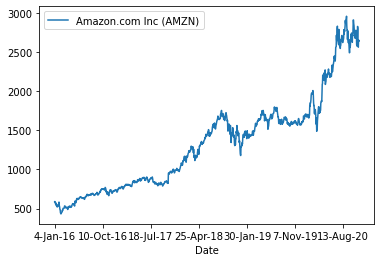

In [25]:
import matplotlib.pyplot as plt

def plotStock(df,name='Nome'):
    df.plot(x='Date',y=name)
    
plotStock(df,'Amazon.com Inc (AMZN)')

3. [1pt] Converti il dataframe in numpy, calcola i ritorni giornalieri (prezzo_giorno_successivo/prezzo_giorno_precendete - 1) e visualizzali in 16 plot diversi 

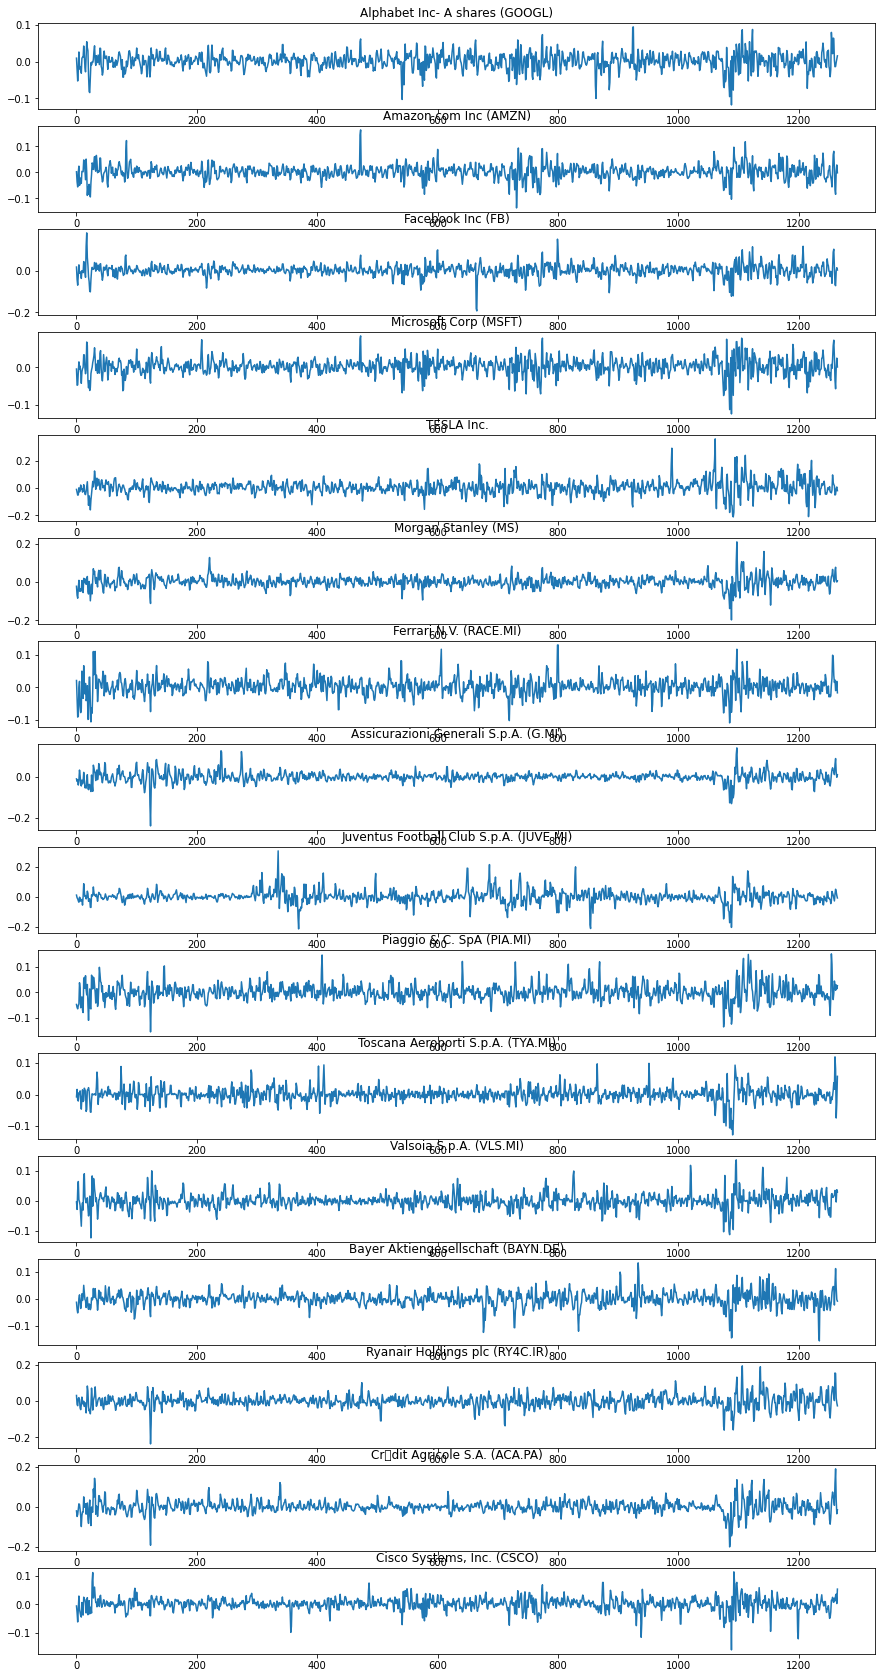

In [28]:
import numpy as np

dfnp = df.to_numpy()
dfnp=dfnp.transpose()
ritorni=[]
#print(dfnp)
for stonk in dfnp[1:]:
    rit=[]
    for i in range(1,len(stonk)-1):
        rit.append(stonk[i+1]/stonk[i-1]-1)
    ritorni.append(rit)
#print(ritorni)
fig, axs = plt.subplots(16)
fig.set_figheight(30)
fig.set_figwidth(15)
giornieff=list(dfnp[0][1:-1])
xx=[i for i in range(len(ritorni[0]))]
names=df.columns[1:]
#print(giornieff)
for i in range(16):
    
    axs[i].plot(xx,ritorni[i])
    axs[i].set_title(names[i])
    #axs[i].set_xticks(xx)
    #axs[i].set_xticklabels(giornieff) #non so perchè non riesce a compilare

4. [1pt] Rispetto ai ritorni, calcola la media, deviazione standard, le correlazioni. 

Quale azione ha ritorni medi maggiori da inizio Gennaio 2016 ad ora? Qual è la più volatile (maggiore deviazione standard)?\
Quale azione ha ritorni medi maggiori da inizio Gennaio 2020 ad ora? Qual è la più volatile (maggiore deviazione standard)?

In [29]:
rit_medi=[np.mean(az) for az in ritorni]
indice1=rit_medi.index(max(rit_medi))
print('i maggiori ritorni medi ce li ha ' + names[indice1])

vol1=[np.std(az) for az in ritorni]
indice2=vol1.index(max(vol1))
print('la azione più volatile è ' + names[indice2])


primogennaio,=np.where(dfnp[0]=='1-Jan-20')
primogennaio=int(primogennaio)

rit_medi2020=[np.mean(az[primogennaio:]) for az in ritorni]
indice3=rit_medi2020.index(max(rit_medi2020))
print('\ni maggiori ritorni medi nel 2020 ce li ha ' + names[indice3])

vol2020=[np.std(az[primogennaio:]) for az in ritorni]
indice4=vol2020.index(max(vol2020))
print('la azione più volatile del 2020 è ' + names[indice4])



i maggiori ritorni medi ce li ha TESLA Inc.
la azione più volatile è TESLA Inc.

i maggiori ritorni medi nel 2020 ce li ha TESLA Inc.
la azione più volatile del 2020 è TESLA Inc.


5. [1pt] Un portafoglio è un insieme di assets, ad esempio:

GOOGL 3 azioni\
AMZN 4 azioni\
FB 5 azioni

Il valore del portafoglio è 3 * prezzo di GOOGL + 4 * prezzo di AMZN + 5 * prezzo di FB

Costruisci il portafoglio che fa stonks nel 2020, ovvero che, se costruito il 01/01/2020 con 1000000€, ad oggi avrebbe il maggior valore, con le seguenti condizioni:

- all'inizio in ogni società non puoi investire più di 200000€ (20%)
- il numero di azioni acquistate di ogni società deve essere un intero non negativo
- non ci sono tassi di interesse, dividendi, commissioni e simili
- bisogna investire almeno il 99% della liquidità, la rimenente non verrà considerat

In [30]:
import math

# Esempio di portafoglio:

#portfolio_test = pd.DataFrame(data={'Code': ["GOOGL","AMZN","FB"], 'NumStocks': [3,4,5],
                                    #'Value 01/01/20': [1193.6639,1646.7944,182.9187],
                                    #'Value 13/11/20': [1501.4839,2650.7724,234.636]})

#print(portfolio_test)

liquidita=1000000
spesatot=0
codeazione=list(names)
prezziiniziali=[az[primogennaio] for az in dfnp[1:]]
prezzifinali=[az[-1] for az in dfnp[1:]]
valratio=[prezzifinali[i]/prezziiniziali[i] for i in range(len(prezzifinali))]
#print(valratio)
portfolio_names=[]
portfolio_numstocks=[]
portfolio_value1=[]
portfolio_value2=[]
while spesatot<1000000:
    spesamax=0
    if not valratio:
        print('terminato')
        break
    indexx=valratio.index(max(valratio))
    price=prezziiniziali[indexx]
    if spesatot+math.floor(200000/price)*price<=1000000:
        numazioni=math.floor(200000/price)
        portfolio_names.append(codeazione[indexx])
        portfolio_numstocks.append(numazioni)
        portfolio_value1.append(price)
        portfolio_value2.append(prezzifinali[indexx])
        spesatot+=numazioni*price
    else:
        i=0
        while spesamax<=200000:
            i+=1
            if price*i+spesatot>1000000:
                break
            else: 
                spesamax+=price
        if i-1:
            portfolio_names.append(codeazione[indexx])
            portfolio_numstocks.append(i-1)
            portfolio_value1.append(price)
            portfolio_value2.append(prezzifinali[indexx])
            spesatot+=(i-1)*price
    valratio.pop(indexx)
    prezziiniziali.pop(indexx)
    prezzifinali.pop(indexx)
    codeazione.pop(indexx)
    #print(spesatot)
    
portfolio = pd.DataFrame(data={'Code': portfolio_names, 'NumStocks': portfolio_numstocks,
                                    'Value 01/01/20': portfolio_value1,
                                    'Value 13/11/20': portfolio_value2})

print(portfolio)   
print(f'\nspesa totale: {spesatot}€')
valtot=[portfolio_numstocks[i]*portfolio_value2[i] for i in range(len(portfolio_numstocks))]
print(f'\nvalore attuale totale: {sum(valtot)}€ , rendimento del {(sum(valtot)-spesatot)/spesatot*100}%')

terminato
                             Code  NumStocks  Value 01/01/20  Value 13/11/20
0                      TESLA Inc.       2682        74.56311        346.0870
1           Amazon.com Inc (AMZN)        121      1646.79440       2650.7724
2           Microsoft Corp (MSFT)       1434       139.43300        183.4303
3               Facebook Inc (FB)       1093       182.91870        234.6360
4  Alphabet Inc- A shares (GOOGL)        167      1193.66390       1501.4839
5         Valsoia S.p.A. (VLS.MI)        133        11.54400         13.8000
6       Piaggio & C. SpA (PIA.MI)          2         2.58590          2.5580

spesa totale: 999999.83962€

valore attuale totale: 2021033.3198999998€ , rendimento del 102.10336440333757%


FACOLTATIVO PER BONUS: Costruisci ad oggi il portafoglio che avrebbe la migliore performance al 31/12/2020 (implementa la tua strategia preferita)